This is a template for your group mini-project. You are free not to use this template, as long as you have clearly labeled sections corresponding to those in the project description. 

# Group Project

*By Ziwei Li, Yilia Zhao, and Shiyu Ma*

## Group Contributions Statement

Students 1 and 3 worked on...Student 2 led the creation of...All three students contributed to the following items equally...

# Data Acquisition

In this section, you should acquire your data and read it into Python

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [7]:
# your code here
# you are encouraged to add more cells -- don't let your code chunks get too big
# you should also add additional markdown cells when describing your strategy
# and discussing your results

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

#shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


# Exploratory Analysis

In this section, you should explore your data using summary tables and plots. You should clearly **explain the importance** of each table or plot that you produce, and make clear how it informs your modeling decisions in the modeling section.

In this section, you may choose to include a subsection on *Data Preparation*. If so, make sure to clearly explain your steps there as well. You are required to split your data into a training and test set; you might choose to do that in this section. 

In [ ]:
# your code here
# you are encouraged to add more cells -- don't let your code chunks get too big
# you should also add additional markdown cells when describing your strategy
# and discussing your results


### §2. Scatterplot by species

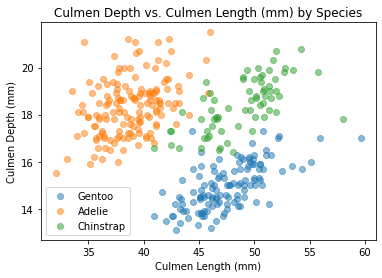

In [17]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)",
      title="Culmen Depth vs. Culmen Length (mm) by Species") #set x,y axis name

species=set(penguins["Species"]) #get all types of species

for s in species:
    only=penguins[penguins["Species"]==s] #for a given species
    #plot its length~depth
    #label=s.split(' ')[0] get the first word in species name
    ax.scatter(only["Culmen Length (mm)"],only["Culmen Depth (mm)"],label=s.split(' ')[0],alpha=0.5)

ax.legend() #add legend as label specified above


From the graph above, we can see that Adelie penguins on average have relatively shorter Culmen Length (< 45mm approximately) compared to that of the other two species. Also, Gentoo penguins have relatively smaller Culmen Depth (<17 mm approximately). These two features may be helpful to determine the species in later analysis.

### §3. Culmen length histogram

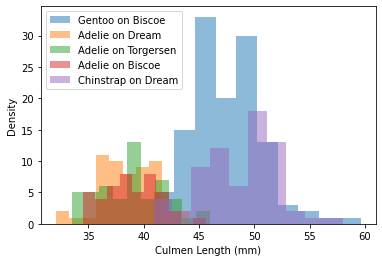

In [18]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Density") #set x,y axis name

species=set(penguins["Species"]) #get all types of species
islands=set(penguins["Island"])  #get all types of islands

for s in species:
    for i in islands:
        only=penguins[(penguins["Species"]==s) & (penguins["Island"]==i)] #for a given species and location
        only=only["Culmen Length (mm)"].dropna()
        if only.empty:continue #avoid error
        #"format of display" % (modify)
        ax.hist(only,label='%s on %s' %(s.split(' ')[0],i),alpha=0.5)
ax.legend() #add legend, not in loop


From this graph, we can see that only Adelie penguins exists on the Torgersen island. 

Also, since the blue part has a distinguishly high density compared to the other parts at Culmen Length around 43 to 53 mm, we can guess that if the island is Biscoe, then the majority of the penguins with the corresponding Culmen length are Gentoo penguins. 

In addition, for most of penguins whose Culmen length higher than 45 mm, they are either Gentoo on Biscoe or Chinstrap on Dream in which Gentoo on Biscoe has higher density.

Moreover, we can see that on the Dream island, if the Culmen Length <40mm, it is very likely that the penguin would be an Adelie penguin. Otherwise, it is very likely that it would be a Chinstrap penguin.

### §4. Tables with different selections of variables

1. Table with a lot of columns

In [30]:
penguins=penguins[(penguins["Sex"]=="MALE") | (penguins["Sex"]=="FEMALE")]
penguin_summary_table(["Island","Sex","Species"], 
                      ["Culmen Length (mm)","Culmen Depth (mm)",
                        "Flipper Length (mm)", "Body Mass (g)",
                       "Delta 15 N (o/oo)","Delta 13 C (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Island    Sex    Species                                            
Biscoe    FEMALE Adelie                  37.36              17.70   
                 Gentoo                  45.56              14.24   
          MALE   Adelie                  40.59              19.04   
                 Gentoo                  49.47              15.72   
Dream     FEMALE Adelie                  36.91              17.62   
                 Chinstrap               46.57              17.59   
          MALE   Adelie                  40.07              18.84   
                 Chinstrap               51.09              19.25   
Torgersen FEMALE Adelie                  37.55              17.55   
          MALE   Adelie                  40.59              19.39   

                            Flipper Length (mm)  Body Mass (g)  \
Island    Sex    Species                                         
Biscoe    FEMALE Adelie                  187.18        3369.32   
                 Gentoo                  212.71        4679.74   
          MALE   Adelie                  190.41        4050.00   
                 Gentoo                  221.54        5484.84   
Dream     FEMALE Adelie                  187.85        3344.44   
                 Chinstrap               191.74        3527.21   
          MALE   Adelie                  191.93        4045.54   
                 Chinstrap               199.91        3938.97   
Torgersen FEMALE Adelie                  188.29        3395.83   
          MALE   Adelie                  194.91        4034.78   

                            Delta 15 N (o/oo)  Delta 13 C (o/oo)  
Island    Sex    Species                                          
Biscoe    FEMALE Adelie                  8.77             -25.92  
                 Gentoo                  8.19             -26.20  
          MALE   Adelie                  8.87             -25.92  
                 Gentoo                  8.30             -26.17  
Dream     FEMALE Adelie                  8.91             -25.74  
                 Chinstrap               9.25             -24.57  
          MALE   Adelie                  8.98             -25.76  
                 Chinstrap               9.46             -24.53  
Torgersen FEMALE Adelie                  8.66             -25.74  
          MALE   Adelie                  8.92             -25.84

From the table above, we can see that for all penguins with different species, sexes and Islands, their data for Delta 15, Delta 13, and Flipper Length seem to be similar. Thus we can get rid of these three columns to prevent overfitting brought by fitting the random noises.

2. Table with helpful columns

In [26]:
# Improved Table
penguin_summary_table(["Island","Species"], 
                      ["Culmen Length (mm)","Culmen Depth (mm)",
                       "Body Mass (g)"])


Culmen Length (mm)  Culmen Depth (mm)  Body Mass (g)
Island    Species                                                        
Biscoe    Adelie                  38.98              18.37        3709.66
          Gentoo                  47.50              14.98        5076.02
Dream     Adelie                  38.50              18.25        3688.39
          Chinstrap               48.83              18.42        3733.09
Torgersen Adelie                  38.95              18.43        3706.37

Through "Eye-balling", we first get the table above with Culmen Length, Culmen Depth, and Body Mass as the three most helpful variables that can help determine the species. We will use systematic feature selection later in the Modeling section to continue exploring the useful features.



# Modeling

In this section, you should build several machine learning models (one per student in your group). For each model, you should demonstrate the use of cross-validation to obtain optimal model complexity parameters. Your aim is to present a model with high prediction accuracy (on unseen test data) that uses *a minimal number of columns from the original data set*. 

In [ ]:
# your code here
# you are encouraged to add more cells -- don't let your code chunks get too big
# you should also add additional markdown cells when describing your strategy
# and discussing your results


In [ ]:
def penguin_summary_table(group_cols,value_cols):
    return penguins.groupby(group_cols)[value_cols].mean().round(2) #value_cols is a list, no need double []

In [ ]:
def check_column_score(cols):
    """
    Trains and evaluates the model via crossvalidation on the columns
    of the dataset with select indices
    """
    print("training with columns"+str(cols))

    LR=LogisticRegression()
    return cross_val_score(LR,X_train[cols],y_train,cv=5).mean()


In [ ]:
combos = [['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'],
          ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Island', 'Body Mass (g)','Culmen Length (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Island', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)']]

for combo in combos:
    x=check_column_score(combo)
    print("CV score is "+str(np.round(x,3)))

# Discussion

Reflect on your findings, as outlined in the project description.

*Discuss here*. 